Task 4: Perform 'Exploratory Data Analysis' on dataset 'Indian Premier League'

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [97]:
delivery_df = pd.read_csv("/content/deliveries.csv")
matches_df = pd.read_csv("/content/matches.csv")

In [98]:
delivery_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [99]:
matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [100]:
print("Number of matches played:",matches_df.shape[0])
print("Number of seasons:", len(matches_df.season.unique()))

Number of matches played: 756
Number of seasons: 12


How many matches we got in the dataset?

In [101]:
matches_df['id'].max()

11415

How many seasons we got in the dataset?

In [102]:
matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

which team had won by maximum runs?

In [103]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

which team had won by maximum wickets?

In [104]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

Team won by minimum runs

In [131]:
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

Team won by minimum wickets

In [106]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

Observation
1. Mumbai is the team which won by maximum and minimum runs.
2. Kolkata Knight Riders is the team which won by maximum and minimum wickets.

Number of matches each session:

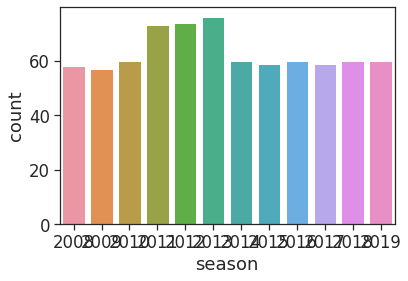

<Figure size 1080x576 with 0 Axes>

In [107]:
sns.countplot(x='season', data=matches_df)
plt.figure(figsize=(15,8))
plt.show()

Number of matches each venue:

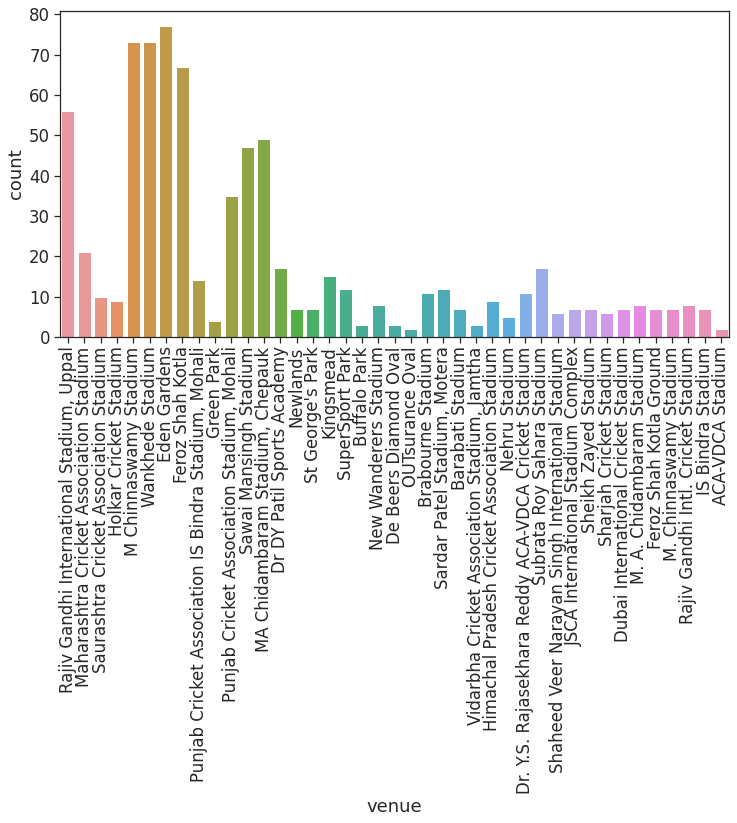

In [108]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

In [109]:
temp_df = pd.melt(matches_df, id_vars=['id','season'], value_vars=['team1','team2'])

In [110]:
temp_df

,id,season,variable,value
0,1,2017,team1,Sunrisers Hyderabad
1,2,2017,team1,Mumbai Indians
2,3,2017,team1,Gujarat Lions
3,4,2017,team1,Rising Pune Supergiant
4,5,2017,team1,Royal Challengers Bangalore
...,...,...,...,...
1507,11347,2019,team2,Mumbai Indians
1508,11412,2019,team2,Mumbai Indians
1509,11413,2019,team2,Delhi Capitals
1510,11414,2019,team2,Chennai Super Kings


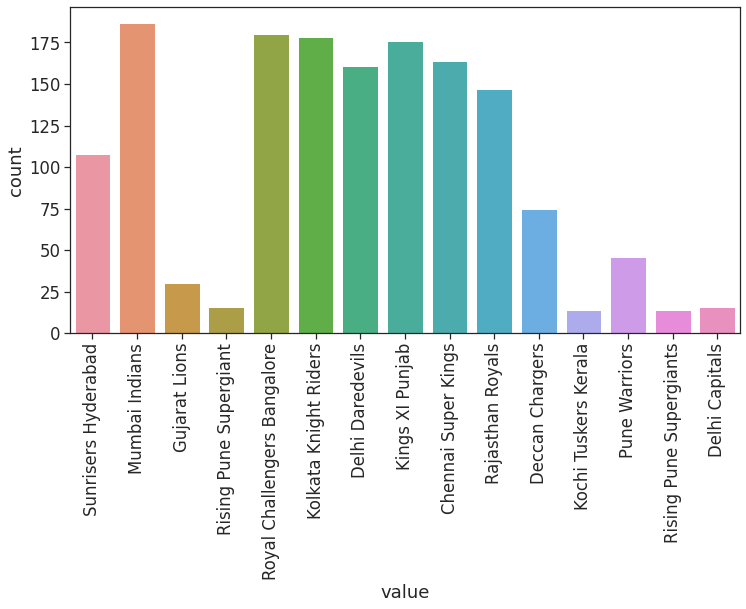

In [111]:
plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

Number of wins per team:

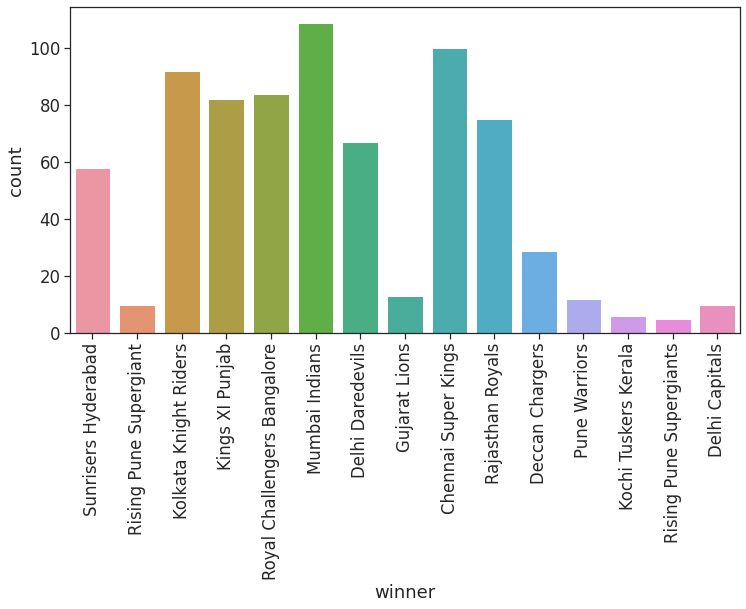

In [112]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

Champion each season

In [113]:
temp_df = matches_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)

In [114]:
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


Toss Decision:

In [115]:
temp_series = matches_df.toss_decision.value_counts()
temp_series

field    463
bat      293
Name: toss_decision, dtype: int64

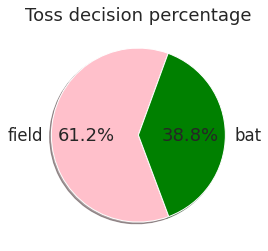

In [116]:
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['pink','green']
plt.pie(sizes, labels=labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=70)
plt.title('Toss decision percentage')
plt.show()

Almost 61.2 of the toss decisions are made to field first.

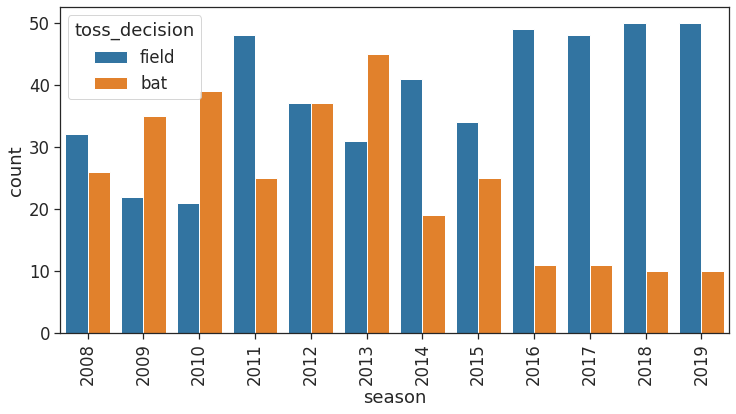

In [117]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches_df)
plt.xticks(rotation='vertical')
plt.show()

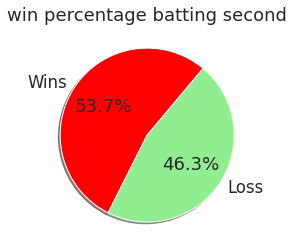

In [118]:
num_of_wins = (matches_df.win_by_wickets>0).sum()
num_of_loss = (matches_df.win_by_wickets==0).sum()
labels = ["Wins","Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['red', 'lightgreen']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=50)
plt.title("win percentage batting second")
plt.show()


Most successful players

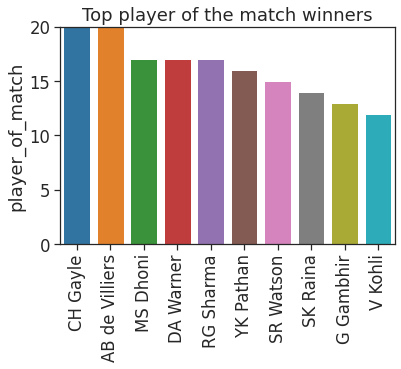

In [119]:
top_players = matches_df.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match winners")
sns.barplot(x=top_players.index, y=top_players, orient='v')
plt.xticks(rotation='vertical')
plt.show()

In [120]:
ss = matches_df['toss_winner'] == matches_df['winner']
ss.groupby(ss).size()

False    363
True     393
dtype: int64

In [121]:
round(ss.groupby(ss).size() / ss.count() * 100,2)


False    48.02
True     51.98
dtype: float64

In [122]:
matches_df[matches_df['win_by_runs']>0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)

winner
Delhi Capitals                 37.0
Rising Pune Supergiants        26.5
Rajasthan Royals               26.0
Mumbai Indians                 25.0
Kolkata Knight Riders          24.5
Chennai Super Kings            24.0
Pune Warriors                  23.0
Royal Challengers Bangalore    20.0
Rising Pune Supergiant         20.0
Kings XI Punjab                17.0
Delhi Daredevils               17.0
Sunrisers Hyderabad            15.5
Deccan Chargers                14.5
Kochi Tuskers Kerala           11.5
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64

Orange cap:

In [123]:
orange_cap = matches_df[['id','season']]
orange_cap = orange_cap.merge(delivery_df, left_on = 'id', right_on = 'match_id')
orange_cap = orange_cap.groupby(['batsman','season'])['batsman_runs'].sum().reset_index()
orange_cap = orange_cap.sort_values('batsman_runs', ascending=False)
orange_cap = orange_cap.drop_duplicates(subset = ['season'], keep = 'first')

In [124]:
orange_cap

,batsman,season,batsman_runs
1700,V Kohli,2016,973
799,KS Williamson,2018,747
946,MEK Hussey,2013,733
321,CH Gayle,2012,733
388,DA Warner,2019,727
1357,RV Uthappa,2014,660
387,DA Warner,2017,641
1553,SR Tendulkar,2010,618
1474,SE Marsh,2008,616
320,CH Gayle,2011,608


Purple cap:

In [125]:
types_of_dismissal = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']
purple_cap = delivery_df[delivery_df['dismissal_kind'].isin(types_of_dismissal)]
purple_cap = purple_cap.merge(matches_df, left_on='match_id', right_on='id')
purple_cap = purple_cap.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()
purple_cap = purple_cap.sort_values('dismissal_kind', ascending = False)
purple_cap = purple_cap.drop_duplicates('season', keep = 'first').sort_values(by='season')
purple_cap.columns=['season', 'bowler', 'count_wickets']

In [126]:
purple_cap

,season,bowler,count_wickets
75,2008,Sohail Tanvir,22
152,2009,RP Singh,23
241,2010,PP Ojha,21
367,2011,SL Malinga,28
437,2012,M Morkel,25
509,2013,DJ Bravo,32
639,2014,MM Sharma,23
695,2015,DJ Bravo,26
774,2016,B Kumar,23
861,2017,B Kumar,26


Most Successful Team

In [127]:
sixes = delivery_df[delivery_df['batsman_runs'] == 6]['batting_team'].value_counts().reset_index()
fours = delivery_df[delivery_df['batsman_runs'] == 4]['batting_team'].value_counts().reset_index()
scores = sixes.merge(fours, left_on = 'index', right_on = 'index')
scores.columns = [['team_name', '4s', '6s']]

In [128]:
scores

,team_name,4s,6s
0,Royal Challengers Bangalore,1132,2360
1,Mumbai Indians,1096,2588
2,Kings XI Punjab,976,2458
3,Chennai Super Kings,973,2193
4,Kolkata Knight Riders,930,2434
5,Delhi Daredevils,801,2158
6,Rajasthan Royals,681,2035
7,Sunrisers Hyderabad,533,1444
8,Deccan Chargers,400,957
9,Pune Warriors,196,525


Top Umpire

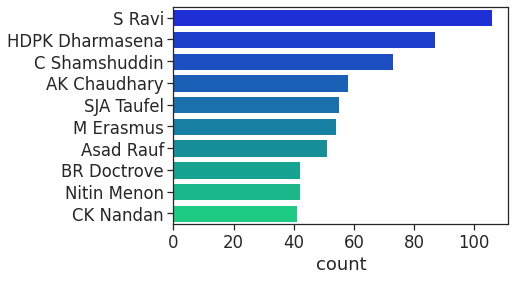

In [129]:
ump = pd.DataFrame(pd.concat([matches_df['umpire1'], matches_df['umpire2'],]), columns=['count'])
ump = ump.apply(pd.value_counts)

sns.barplot(y = ump[:10].index, x = ump[:10]['count'], palette='winter')

### Thank You